# 다항 회귀(Polynomial Regression) 와 오버피팅/언터피팅

In [ ]:
단항 회귀
- 독립 변수(피처)와 종속 변수(타깃)의 관계가 일차 방정식 형태

다항 회귀 
- 회귀가 '독립변수'의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- 선형 회귀 (비선형 회귀 아님)
- (선형/비선형 구분은 회귀 계수가 선형/비선형 여부에 따른 것이지
  독립변수의 선형/비선형 여부와는 무관)
- 피처 X에 대해 타깃 Y 갓의 관계를 단순 션형회귀 직선형으로 표현한 것보다
- 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

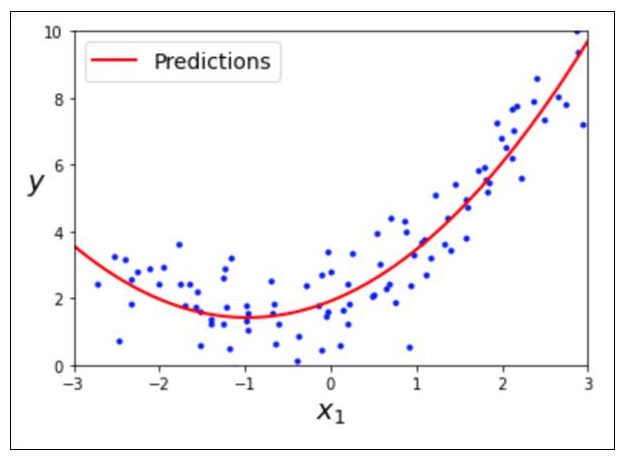

In [ ]:
PolynomialFeatures 클래스
- PolynomialFeatures 클래스를 통해서 피처를 다항식 피처로 변환
- PolynomialFeatures(degree=2) : 2차 다항식
- fit()/transform() 메서드를 사용해서 변환 작업 수행

In [ ]:
PolynomialFeatures 클래스로 다항식 변환
단항값을 2차 다항값으로 변환하는 예

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 단항식 생성
X = np.arange(6). reshape(3, 2)
print('일차 단항식 계수 feature : \n', X)

# (x1, x2)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]
 [4 5]]


In [5]:
# PolynomialFeatures를 이용하여
# degree = 2인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 features : \n', poly_ftr)

# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

변환된 2차 다항식 계수 features : 
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


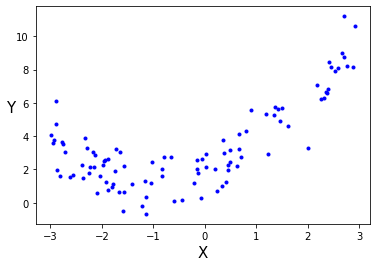

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)  # 약간의 노이즈 포함

plt.plot(X, y, "b.")
plt.ylabel("Y", fontsize=15, rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

# 그래프 설명
# 데이터의 분포가 곡선 형태로 나타남 : 비선형
# 일반적인 선형 회귀로는 해결할 수 없음

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0], X[1])
print(X_poly[0], X_poly[1])

[-1.75132657] [-2.16692364]
[-1.75132657  3.06714474] [-2.16692364  4.69555808]


In [ ]:
include_bias=True : 디폴트
절편 값으로 1이 추가
1 + ax + bx 

include_bias=False : 절편 값으로 1이 추가되지 않음

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89726413]), array([[1.06541502, 0.54419222]]))

In [18]:
X_new = np.linspace(-3,3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

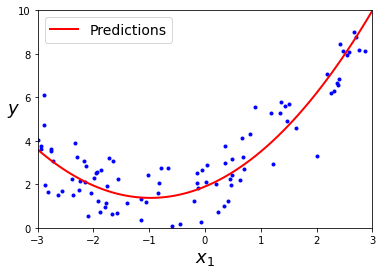

In [23]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# $ : matplotlib 수학적 표현
# a_1 : 아래첨자
# a^1 : 위첨자

In [ ]:
# 3차 다항식 결정값을 구하는 함수 생성 : polynomial_func(X)

In [30]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0, 4).reshape(2,2)

print('일차 단항식 계수 feature :\n', X)
y = polynomial_func(X)
print('삼차 다항식 계수 feature :\n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('변환된 삼차 다항식 계수 feature :\n', poly_ftr)

# LinearRegressio에 3차 다항식 계수 feature와
# 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 계수 feature :
 [  5 125]
변환된 삼차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습  
사이킷런의 파이프라인(Pipeline)을 이용하여 3차 다항 회귀 학습  

사이킷런 Pipeline
- 피처 변환과 선형 회귀 적용을 별도로 하지 않고
- 다항 회기를 한 번에 구현
- Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 PolynomialFeatures 변환과 LinearRegression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 보스턴 주택가격 예측

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.datasets import load_boston

In [55]:
# boston 데이터 셋 로드
boston = load_boston()

# DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF.head(3)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [56]:
# boston.target을 PRICE 칼럼으로 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', bostonDF.shape)

Boston 데이터셋 크기 : (506, 14)


In [57]:
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [58]:
y_target = bostonDF['PRICE']  # 타깃 데이터셋
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False) # 피처 데이터셋

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

###  Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression을 순차적으로 결합 (3가지)
(1) degree=2  
(2) degree=2, include_bias=False  
(3) degree=3, include_bias=False

In [59]:
# (1) degree=2
# 'poly' : 첫 번째 스탭의 이름 (변수명처럼 직접 만듦)
# 'linear' : 두 번째 스탭의 이름 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)

# liner 스탭의 속성 coef_를 반환
print('Polynomial 회귀 계수 \n', np.round(p_model.named_steps['linear'].coef_, 2))

y_preds = p_model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# (1) 다항회귀 degree=2 결과
# MSE : 24.282, RMSE : 4.928
# Variance score : 0.659 

# MSE와 RMSE는 단항 회귀보다 높게 나왔고
# Variance score는 약간 작아짐

# 단항(선혀) 회귀 결과
# MSE : 17.297, RMSE : 4.159
# Variance score : 0.757

##################
# RMSE는 작을수록
# Variance score는 1에 가까울수록 
# 예측 정확도가 높음

Polynomial 회귀 계수 
 [ 1.0906374e+09 -8.1400000e+00 -1.0000000e-01 -7.0000000e+00
  3.6980000e+01  2.5363000e+02  3.0970000e+01  1.0900000e+00
 -1.2020000e+01  3.1000000e+00 -6.0000000e-02  7.7500000e+00
  2.0000000e-02  4.6000000e-01 -0.0000000e+00  2.7000000e-01
  6.8000000e-01  1.8600000e+00 -1.2000000e-01  9.0000000e-02
  0.0000000e+00 -2.0000000e-01  5.8000000e-01 -6.0000000e-02
  8.7000000e-01 -0.0000000e+00  4.0000000e-02 -0.0000000e+00
 -2.0000000e-02 -1.7000000e-01 -2.0900000e+00 -2.0000000e-02
  0.0000000e+00 -2.0000000e-02  1.0000000e-02  0.0000000e+00
 -2.0000000e-02  0.0000000e+00 -1.0000000e-02  5.0000000e-02
 -4.9000000e-01 -9.0000000e-02  2.9000000e-01  1.0000000e-02
  2.1000000e-01 -5.0000000e-02  0.0000000e+00 -3.0000000e-02
  1.0000000e-02 -1.0000000e-02  3.6980000e+01 -2.9240000e+01
 -5.9500000e+00 -5.0000000e-02  1.7700000e+00 -2.0000000e-02
  3.0000000e-02 -1.9000000e+00  2.0000000e-02 -1.3000000e-01
 -7.7010000e+01 -5.0600000e+00 -5.1000000e-01  2.2740000e+01
 -4.9

In [60]:
# (2) degree=2, include_bias=False 튜닝

p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# degree=2, include_bias=False 튜닝 결과
# MSE : 15.556, RMSE : 3.944
# Variance score : 0.782

# 전반적으로 수치 좋아짐

# degree=2 결과
# MSE : 24.282, RMSE : 4.928
# Variance score : 0.659

MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [62]:
# (3) degree=3, include_bias=False

p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# MSE, RMSE가 급격히 상승하면서 오버피팅이 발생했음
# MSE : 79625.593, RMSE : 282.180
# Variance score : -1116.598

# 다항회귀의 단점 : 오버피팅이 발생하기 쉽다

MSE : 79625.593, RMSE : 282.180
Variance score : -1116.598


In [64]:
# 다항식에서 degree 크기 주의

# 다항식 변환 후 피처 수 확인
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

# 1차 다항식인 경우 X_train의 피처수 : 13
# 2차 다항식 변환 후 : 피처 수 104개로 늘어남

# 다항식 값이 높아질수로고 오버피팅을 급격하게 진행하고 오차가 늘어나게 됨
# 다항식 변환을 해서 사용할 때는 degree에 대해 주의를 해야 함

((354, 104), (354, 13))

In [65]:
# 3차 다항식 변환 후 : 피처 수 559개로 늘어남

X_train_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 559), (354, 13))

In [ ]:
### Polynomial Regression을 이용한 Underfitting, Overfitting 이해

다항 회귀를 이용한 과속적합 및 과(대)적합 이행
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관래를 모델링할 수 있지만
- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춰진 학습이 이루어져 과적합 문제 발생

In [ ]:
다항 회기 차수를 변화시키면서 예측 곡선과 예측 정확도 비교 예제

학습 데이터
- X : 30개의 임의의 데이터. 피처
- y : X의 코사인 값에서 약간의 노이즈 변동 값을 더한 타깃 값

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

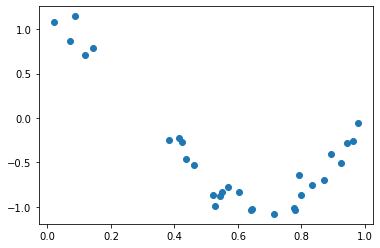

In [68]:
# 그래프로 표시
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417000e+06  2.03717200e+07
 -1.44874017e+08  7.09319141e+08 -2.47067172e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920642e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.83 입니다.


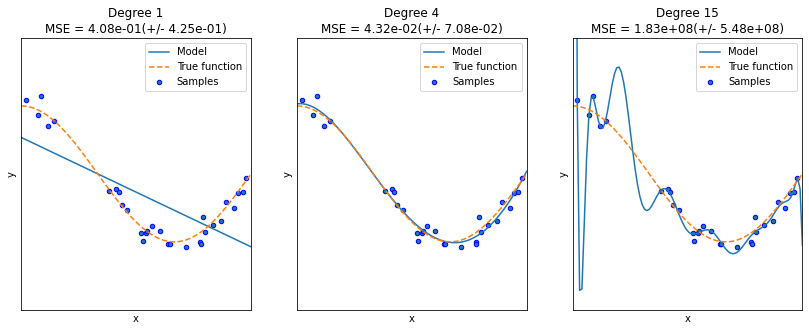

In [71]:
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 예측 결과 비교
# 차수별 회귀 에측 곡선 표시

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):   
   
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    # 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균 (cv=10)
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 그래프로 표시
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=()) # setp() : 프로퍼티 설정
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선 : 다항 회귀 예측 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선 : 실제 데이터 세트 X, y의 코사인 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    # 학습 데이터 
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))  

plt.show()

# 결과
# 학습 데이터
# X : 0~1 까지 30개의 임의의 값
# y : X값에 따른 코사인 값에 노이즈를 변동값으로 추가해서 구성
# MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 값 (cv=10)

# 왼쪽 그래프 : degree=1 예측 곡선
# 단순 선형 회귀와 동일
# 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 부적합
# 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못한 과소적합 모델
# MSE : 0.41
    
# 가운데 그래프 : degree=4 예측 곡선
# 예측 곡선이 실제 데이터 세트와 유사
# 변동하는 노이즈까지 완벽히 예측하지는 못했지만
# 학습 데이터 세트를 비교적 잘 반영해서
# 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델
# MSE : 0.04(가장 뛰어난 예측 성능을 나타냄)
    
# 오른쪽 그래프 : degree=15인 예측 곡선
# MSE 값이 182581084.83로 상당히 높은 수치의 오류값 발생
# 과적합을 확인하기 위해 dgree를 매우 높은 15차수로 설정한 결과
# 데이터 세트의 변동 노이즈까지 지나치게 반영한 결과로
# 예측 곡선이 학습 데이터 세트만 정확하게 예측하고
# 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐
# 결과적 학습 데이터에 너무 충실하게 맞춘 과적합이 심함 모델이 되었고
# 어이 없는 수준의 높은 MSE 값이 산출되었음
# degree 15라는 아주 복잡한 다항식을 만족하기 위해 계산왼 회귀 계수는
# 결국 현실과 너무 동떨어진 예측 결과 보임

In [ ]:
# 결론
# 좋은 예측 모델이란?
# degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고
# degree 15과 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌
# 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델

## 편향-분산 트레이드 오프 (Bias-Variance Trade Off)

In [ ]:
편항 : 한 방향으로 치우치는 것 (정확한 결과에 집중 또는 벗어나는 것)
분산 : 분포도
    
앞의 degree 1 모델
- 매우 단순화된 모델
- 지나치게 한 방향성으로 치우친 경향
- 고편향성

degree 15 모델
- 학습 데이터 하나하나의 특서을 반영하면서 매우 복잡한 모델
- 변동성이 심함
- 고분산성

(1) 상단 왼쪽 : 저편향/저분산 (Low/Low)
- 예측 결가가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 (저편향)
- 특정 부분에 집중되어 있는 아주 뛰어난 성능 (저분산)
- 아주 드물게 좋은 경우

(2) 상단 오른쪽 : 저편향/고분산 (Low/High) 
- 예측 결과가 실제 결과에 비교적 근접하지만 (저편향)
- 예측 결과 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있음 (고분산)
- 과적합

(3) 하단 왼쪽 : 고편향/저분산 (High/Low)
- 정학한 결과에서 벗어나면서도 (고편향)
- 예측이 특정 부분에 집중되어 있음 (저분산)
- 과소적합

(4) 하단 오른쪽 : 고편향/고분산 (High/High)
- 예측 결과를 벗어나면서고 (고편향)
- 넓은 부분에 분포 (고분산)

In [ ]:
# 그림 편향-분산

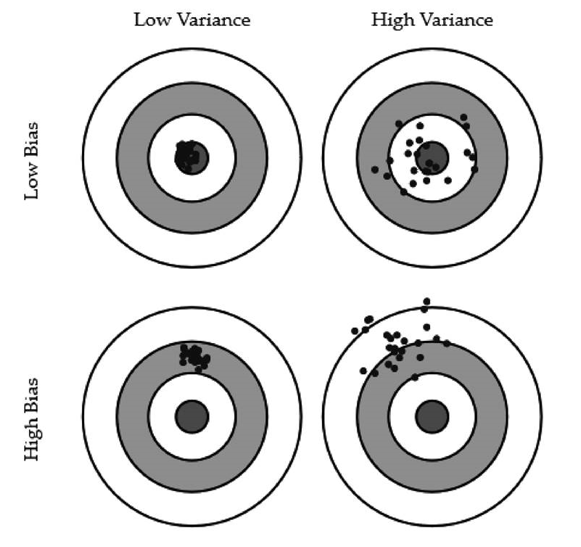

In [ ]:
편향-분산 트레이드 오프
- 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음
- 즉, 편향이 높으면 분산이 낮아지고 (과소적합)
- 반대로 분산이 높으면 편향이 낮아짐 (과적합)

편향과 분산의 관계에 따른 전체 오류값의 변화
- 편향이 너무 높으면 전체 오류가 높음
- 편향을 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨
- 골디락스 지점 : 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 지점
- 골디락스 지점을 통과하면서 분산을 지속적으로 높이면
- 전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하됨

편향-분산 트레이드 오프 고려한 예측 모델
- 고편향/저분산 : 과속적합
- 저편향/고분산 : 과적합
- 편향과 분산이 서로 트레이드 오프를 이루면서
- 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이
- 가장 효율적인 머신러닝 예측 모델을 만든 방법

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
Regularized Linear Models - Ridge, Lasso, Elastic Net

In [ ]:
규제
- 비용함수에 alpha 값으로 패널티를 부여해서
- 회귀 곗수 값의 크기를 감소시켜 과적합을 개선하는 방식
- L2 방식과 L1 방식

L2 규제
- W의 제곱에 대해 패널티를 부여하는 방식
- 회귀 계수의 크기 감소
- L2 규제를 적용한 회귀 : 릿지(Redge) 방식
    
L1 규제
- W의 절대값에 대해 패널티를 부여하는 방식
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거
- 적절한 피처만 회귀에 포함시키는 피선 선택의 특성
- L1 규제를 적용한 회귀 : 라쏘(Lasso) 회귀
    

Elastic Net : L2, L1 규제를 함께 결합한 모델
- 주로 피처가 많은 데이터 세트에서 적용
- L1 규제로 피처의 개수를 줄임과 동시에
- L2 규제로 계수 값의 크기 조정


In [ ]:
### 릿지(Ridge) 회귀 구현

사이킷런의 Ridge 클래스 사용해서 릿지 회귀 구현  
주요 생성 파라미터는 alpha: alpha L2 규제 계수에 해당

In [73]:
# Ridge 클래스를 이용해서 보스턴 주택 가격 예측/평가

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


boston = load_boston()

# DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터셋의 target 주택 가격
# 이를 PRICE 칼럼으로 데이터 프레임에 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 : ', bostonDF.shape)

y_target = bostonDF['PRICE']  # 타깃 데이터셋
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False) # 피처 데이터셋

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

Boston 데이터셋 크기 :  (506, 14)
5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [75]:
# alpha 값을 0, 0.1,1, 10, 100으로 변경하면서 
# RMSE와 회귀 계수 값의 변화 측정

# Ridge에 사용할 alpha 파라미터 값 
alphas = [0, 0.1, 1, 10, 100]

# alpha 값에 따른 평균 RMSE 구하기
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # 5개 폴드 교차 검증
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))
    
# 결과
# alpha 값이 커질수록 RMSE 값이 줄어듦 : 성능이 좋아짐
# alpha 값이100일 때 5.330을 가장 좋음

# alpha 0 은 규제를 적용하지 않은 회귀와 동일

alpha 0 일 때 5 folds 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 평균 RMSE : 5.788
alpha 1 일 때 5 folds 평균 RMSE : 5.653
alpha 10 일 때 5 folds 평균 RMSE : 5.518
alpha 100 일 때 5 folds 평균 RMSE : 5.330


In [ ]:
# 각 alpha 값에  따른 회귀 값을 시각화
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

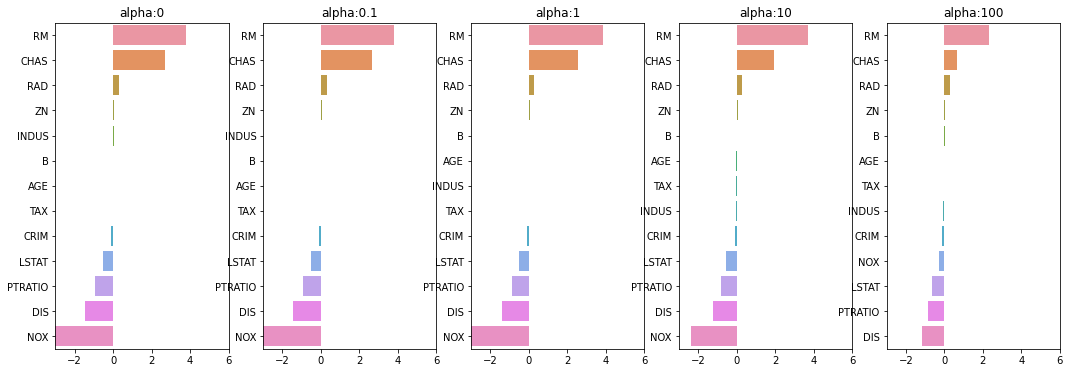

In [76]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. 
# pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha) # 초기화
    ridge.fit(X_data , y_target) # 학습
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 
    # 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

# 결과
# alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐
# 특히 NOX 피처의 경우 alpha 값이 증가함에 따라 회귀 계수가 크게 작아짐

# 그러나 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않음

In [79]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# 결과
# alpha 커지면서 RM 값이 작아짐
# NOX는 가장 크게 줄어듦
# 예측 성능이 좋을 수 있는 이유는
# NOX 값의 회귀 계수 값을 상당히 적절한 수준으로 맞춰 들어가서
# 최적의 회귀 모델이 만들어질 수 있었음

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [ ]:
## 라쏘 (Lasso) 회귀
- W(회귀 계수)의 절대값에 패널티를 부여하는 L1규제를 선형 회귀에 적용한 것
- 영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거
- 적절한 피처만 회귀에 포함시키는 피처 선택의 특성

사이킷런의 Lasso 클래스를 이용해서 라쏘 회귀 구현
- 주요 생성 파라미터 alpha : 라소 회귀의 alpha L1 규제 계수 해당    

In [ ]:
# 라소 회귀 예제 : 라소의 apha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력

In [81]:
from sklearn.linear_model import Lasso, ElasticNet

# 뒤에 ElasticNet에서도 사용할 수 있도록 함수로 작성
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######') # Log 출력
        
    for param in params:  # alpha 값 변화
        # 모델 별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [84]:
# 라쏘 모델 기반으로 수행

lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# 결과
# 라쏘 : alpha 0.07일 때 가장 좋은 평균 RMSE 5.612 보임

# 릿지가 가장 좋은 수치 : 5.330
# 라쏘가 가장 좋은 수치 : 5.612 
# LinearRegression 수치 : 5.829

# 라쏘가 릿지보다 약간 떨어지는 수치이지만
# LinearRegression 보다는 향상

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [ ]:
# 릿지 결과
alpha 0 일 때 5 folds 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 평균 RMSE : 5.788
alpha 1 일 때 5 folds 평균 RMSE : 5.653
alpha 10 일 때 5 folds 평균 RMSE : 5.518
alpha 100 일 때 5 folds 평균 RMSE : 5.330

In [85]:
# alpha 값에 다른 칼럼별 회귀 계수 출력

sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

# 결과
# alpha 값의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 변경
# NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0이고
# alpha 값을 증가시켠서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀜
# 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻어서
# 성능 향상되었음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [ ]:
### 엘라스틱 넷(Elastic Net) 회귀

- 급격한 회귀 계수 변동을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점 : L1과 L2를 결합한 규제로 수행 시간이 상대적으로 오래 걸린다는 것
- 사이킷런의 ElasticNet 클래스 사용
- 주요 파라미터 : alpha와 l1_ratio
- ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha 값과 다름

엘라스틱 규제 : aL1 + bL2
a : L1 규제의 alpha 값
b : L2 규제의 alpha 값
ElasticNet 클래스의 alpha : a + b
    
l1_ratio : a / (a + b)
l1_ratio가 0이면 a가 0이 되어 L2 규제와 동일
l1_ratio가 1이면 b가 0이 되어 L1규제와 동일

In [86]:
# 엘리스틱넷 예제
# 단순히 alpha값의 변화만 확인하기 위해서
# l1_ratio=0.7로 고정

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

# 결과
# alpha 0.5일 때 RMSE가 5.467 로 가장 좋은 예측 성능 보임

# 엘라스틱 넷 가장 좋은 수치 : 5.467
# 릿지가 가장 좋은 수치 : 5.330
# 라쏘가 가장 좋은 수치 : 5.612 
# LinearRegression 수치 : 5.829

# 엘라스틱넷이 릿지보다 낮지만 라쏘보다는 좋은 수치를 나타냄


#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [ ]:
#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 

In [ ]:
# 릿지 결과
alpha 0 일 때 5 folds 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 평균 RMSE : 5.788
alpha 1 일 때 5 folds 평균 RMSE : 5.653
alpha 10 일 때 5 folds 평균 RMSE : 5.518
alpha 100 일 때 5 folds 평균 RMSE : 5.330

In [87]:
# alpha 값에 다른 칼럼별 회귀 계수 출력

sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

# alpha 값에 따른 피처들의 회귀 계수 값들이
# 라쏘보다는 상대적으로 0이되는 값이 적음을 알 수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [ ]:
규제 선형 회귀의 가장 대표적인 기법인 릿지, 라쏘, 엘라스틱넷 회귀 결론
- 어떤 것이 가장 좋은지는 상황에 따라 다름
- 각 알고리즘에서 하이퍼 파라미터를 변경해 가면서
- 최적의 예측 성능을 찾아내야 함

- 그러나 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지 않게
- 먼제 데이터 분포도의 정규화와 인코딩 방법이 매우 중요함

In [ ]:
선형 회귀 모델을 위한 데이터 변환
- 일반적으로 중요 피처들이나 타깃값의 분포도가
- 심하게 왜곡되었을 경우에 스케일링/정규화 등의 변환 작업 필요

선현 회귀 모델과 같은 선형 모델에서의 데이터 변환
- 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고
- 최적의 선형 함수를 찾아내 결과값을 예측
- 피처값과 타깃값의 분포가 정규분포 형태 선호
- 트기, 타깃값의 경우 특정값의 분포가 치우친 왜곡된 형태의 분포일 경우
- 예측 성능에 부적인 영향을 미칠 가능성이 높음
- 피처값 역시 결정값보다는 덜하지만
- 왜곡된 분포도로 인해 예측 성능에 부정적인 형향을 미칠 수 있음
- 따라서 선형 회귀 모델을 적용하기 전에
- 먼저 데이터에 대한 스케일링/정규화 작업 수행이 일반적
- 그러나 이러한 스케일링/정규화 작업을 선행한다고 해서
- 무조건 예측 성능이 향상되는 것은 아님
- 일반적으로 주요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 스케일링/정규화 등의 변환 작업 수행

In [ ]:
스케일링/정규화 작업 수행 방법
- 일반적으로 피처 데이터 셋과 타깃 데이터 셋에 다른 방법 적용

(1) 사이킷런을 이용해 피처 데이터 셋에 적용하는 변환 작업
방법1 : 스케일링/정규화 수행
    - StandadScaler 클래스 이용해서 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환
    - 또는 MinMaxScaler 클래스를 이용해서 최소값이 0이고, 최대값이 1인 값으로정규화 수행
방법2 : 스케일링/정규화를 수행한 데이터 셋에 다시 다항 특성을 적용하여 변환하는 방법
    - 보통 방법1을 수행했는데 예측 성능에 향상이 없을 경우 적용
방법3 : 로그 변환
    - 원래 값에 log 함수를 적용하면 정규 분포에 가까운 형태로 값이 분포됨
    - 매우 유용한 변환으로, 실제 선형 회귀에서 훨씬 많이 사용
    - 방법1, 2보다 많이 사용하는 이유
        - 방법1의 경우 예측 성능을 크게 기대하기 어려운 경우가 많고
        - 방법2의 경우 피처 수가 많을 경우에 다항 변환으로 생성되는 피처 수가 기하급수적으로 늘어나서
            - 과적합이 발생할 수 있기 때문


(2) 타깃 값의 경우 : 로그 변환 적용
    - 왜곡된 분포도 형태의 타깃값을 로그 변환하여
    - 예측 성능이 향상된 경우가 많은 사례로 검증되었고
    - 결정값을 정규 분포나 다른 정규값으로 변환하면
    - 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있기 때문에
    - 일반적으로 로그 변환 적용

In [ ]:
선형 회귀 모델을 위한 데이터 변환 예
- 보스턴 주택가격 피처 데이터 세트에
- 표준 정규 분포 변환, 최대값/최소값 정규화, 로그 변환을 차례로 적용 후
- RMSE로각 경우별 예측 성능 측정
- 로그 변환에서 np.log() 적용하면 언더 플로우가 발생하기 쉬워서
- 1+log() 함수를 구현한 np.log1p() 함수 사용

In [88]:
y_target.shape

(506,)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

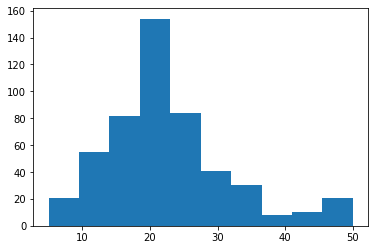

In [92]:
plt.hist(y_target, bins=10)

In [94]:
# 데이터 변환 함수 생성
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:
Ridge 클래스의 alpha 값을 변화시키면서
피처 데이터 세트를 여러 가지 방법으로 변환된 데이터 세트를 입력 받을 경웨
RMSE 값이 어떻게 변하는지 확인

피처 데이터 변환 방법 6개
(1) 변환 없는 원본 데이터
(2) 표준 정규 분포
(3) 표준 정규 본포를 다시 2차 다항식 변환
(4) 최소값/최대값 정규화
(5) 최소값/최대값 정규화를 다시 2차 다항식 변환
(6) 로그 변환

In [95]:
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)

# 결과
# 로그변환 : alpha 0.1, 1, 10인 경우에 모두 성능 향상
# 표준 정규 분포 + 2차 다항식인 경우 alpha 100일 RMSE: 4.634 성능 향상
# 최소값/최대값 정규 + 2차 다항식인 경우 alpha 1일 때  RMSE: 4.323  성능 향상
    
# 표준 정규 분포와 최소값/최대값 정규화 변환은 성능 개선 없음
# 2차 다항식 변환 시는 성능 향상
# 하지만 다항식 변환은 피처 수가 많을 경우 적용하기 힘들고
# 데이터 건수가 많아지면 계산에 많은 시간이 소요되어 적용상 한계가 있음

# 결론 
# 일반적으로 선형 회귀를 적용하려면 데이터 세트에
# 데이터 값의 분포가 심하게 왜곡되어 있을 경우에
# 로그 변환을 적용하는 것이 좋을 결과를 기대할 수 있음    


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴